<a href="https://colab.research.google.com/github/barauna-lo/CAP4213-Deep-Learning/blob/main/LSTM_for_Colored_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>


# Investigating the performance of RNN (GRU and LSTM) to predict different classes of colored noise

This code we gerenete Colored Noise from these python library [colorednoise](https://pypi.org/project/colorednoise/). We will also creating a datafreame for different values of $\beta$ and creating a datafreame with theses data using pandas library. With these data, we expect to train a LSTM model for predict the signal of colored noise


### <font color='red'>_Open Problemns_</font> 

* <font color='red'> Saving the csv with any elemenst has an array </font> 


On the next cell we will import the librarys


</font>

In [ ]:
!pip install colorednoise
import colorednoise as cn
from matplotlib import mlab
from matplotlib import pylab as plt
import numpy as np

On next we will generata a Generate white noise for $\beta = 0$

In [ ]:
#input values
beta = 0         # the exponent: 0=white noite; 1=pink noise;  2=red noise (also "brownian noise")
samples = 2**16 # number of samples to generate (time series extension)
#beta = [0,1,2]

A0 = cn.powerlaw_psd_gaussian(beta, samples)
A0 = np.append(beta,A0)

plt.plot(A0, color='black', linewidth=0.2)
plt.title('Colored Noise for β='+str(beta))
plt.xlabel('Samples (time-steps)')
plt.ylabel('Amplitude(t)', fontsize='large')
#plt.savefig('Noise.pdf')
plt.show()


On the next cell we will generate the Power Spectrum Density function  also for $\beta = 0$

In [ ]:
#Power Spectral Density(PSD) for A(t)
spectrum, frequency = mlab.psd(A0, NFFT=2**13)
plt.loglog(frequency,spectrum, color='black', linewidth=0.8)
plt.title('Power Spectral Density of A(t) with β='+str(beta))
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum Density', fontsize='large')

plt.grid(True)
#plt.savefig('PSD of A(t) with beta='+str(beta)+'.pdf')
plt.show()


On the cell below we will plot the two last chars in a single picture

In [ ]:
#Deffing the great figure size
plt.figure(figsize=(15,5))

#Ploting first subfiure
plt.subplot(1,2,1)
plt.plot(A0, color='black', linewidth=0.2)
plt.title('Colored Noise for β='+str(beta))
plt.xlabel('Samples (time-steps)')
plt.ylabel('Amplitude(t)', fontsize='large')

#Ploting second subfigure
plt.subplot(122)
spectrum, frequency = mlab.psd(A0, NFFT=2**13)
plt.loglog(frequency,spectrum, color='black', linewidth=0.8)
plt.title('Power Spectral Density of A(t) with β='+str(beta))
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum Density', fontsize='large')
plt.grid(True)

#ploting the intire figure
plt.show()

## Generating a DataFrame Using Pandas 🐼

Now, we will allocate several time series in a dataframe with different colored noises for different values of $\beta$. We will use pandas library for these Function. 

Below, there is a hidden cell for generating random values. For now, we just we wil creating some temporal series for witch $\beta$ value. The variation to 0, from 3, in a step of 0.25

In [ ]:
# import random as rd
# beta = rd.uniform(0, 5) #generating a real number between the braket interval
# beta = rd.randint(0, 5) #generating a interger number between the braket interval

In [ ]:
# Import pandas library 🐼
import pandas as pd

In [ ]:

# initialize list of lists
data = []
for i in range(0,13):
    for j in range(0,10):
        beta = round(i/4,2)
        A = cn.powerlaw_psd_gaussian(beta, samples)  #genereting the amplitude noise
        s, f = mlab.psd(A, NFFT=2**13)               #genereting the power spectrum density
        data.append([beta,A,f,s])                    #allocating the genereted data in a matrix

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['beta', 'Series','PSD','Frequency'])
# Exporting the data frame from a .csv file
#df.to_csv(r'colored_noise.csv')
df

# Open problem

On the next cell we will import on of the previus saved dataset generated on the first aplications. Even generating a new data frame, using this last on would be importat for furute comparisons

In [ ]:
#df=pd.read_csv('https://www.dropbox.com/sh/ew55wdqbc519ayd/AAA7UQqs0opzEH_Rf7GLWEeea/tabela_painters.csv?dl=1') 
df1=pd.read_csv('https://www.dropbox.com/s/indlm4581h2838x/colored_noise_dataframe.csv?dl=1')
#df

In [ ]:
import re

df1['Series'][0] == (re.sub("\s+", ",", df1['Series'][0].strip()))
#df1['Series'][0] == np.array(df1['Series'][0])
df1['Series'][0]

In [ ]:
teste = np.array(re.sub("\s+", ",", df1['Series'][0].strip()))
teste2 = df1['Series'][0].strip('[').strip(']').replace("\n","")
teste2 = teste2.split()
a = []
for i in range(len(teste2)): a.append(float(teste2[i]))
#teste1 = df['Series'][0]
#plt.plot(teste1)

In [ ]:
teste1

In [ ]:
df['Series'][0]

On the next cell we will plot the some of these generate time series for $\beta = 0$

In [ ]:

#Ploting
plt.figure(figsize=(15,30))
for i in range(0,10):
    plt.subplot(5,2,i+1)
    plt.plot(df['Series'][i], color='black', linewidth=0.2)
    plt.title('Colored Noise for β='+str(df['beta'][i]))
    plt.xlabel('Samples (time-steps)')
    plt.ylabel('Amplitude(t)', fontsize='large')
#plt.savefig('beta=0.jpg')
plt.show()


In [ ]:

#Ploting
plt.figure(figsize=(15,30))
for i in range(10,20):
    plt.subplot(5,2,i-9)
    plt.plot(df['Series'][i], color='black', linewidth=0.2)
    plt.title('Colored Noise for β='+str(df['beta'][i]))
    plt.xlabel('Samples (time-steps)')
    plt.ylabel('Amplitude(t)', fontsize='large')
    #plt.savefig('charts/beta=0.25.jpg')
#plt.show()


Now we will creating a small gif of these series envolving  time

In [ ]:
#Ploting
#plt.figure(figsize=(0,30))
for i in range(0,len(df['beta']),10):
    #plt.subplot(5,2,i-9)
    plt.plot(df['Series'][i], color='black', linewidth=0.2)
    plt.title('Colored Noise for β='+str(df['beta'][i]))
    plt.xlabel('Samples (time-steps)')
    plt.ylabel('Amplitude(t)', fontsize='large')
    #plt.savefig('charts/beta='+str(df['beta'][i])+'.jpg')
    #plt.show()


# LSTM 
## _Long Shott Term Memory_ 
Now we will introduce a Recurrent Neural Network (RNN) for these kind of RNN we will use the tensorflow library. From that library we will use the Keras for construct our LSTM model

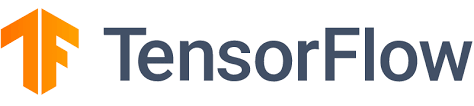

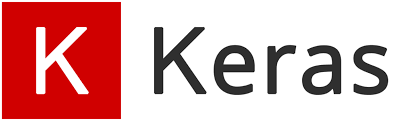

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/2560px-NumPy_logo_2020.svg.png" width =400>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

On the next cell we will creating a function similary to ```train_test_split``` from the ```sklearn``` library. The above logic is importante becouse we will define how many data the LSTM model will use for prodict the next step data. These functions will take the time series data and performe ir by the ```n_features``` data training.

Its import to understand that in LSTM the predicted target will be next value of temporal serie based on a quantity on pre understood data.

In [ ]:
def prepare_data(timeseries_data, n_features):
    X, y = [],[]
    for i in range(len(timeseries_data)):
        # Find the end of this pattern 
        end_ix = i + n_features
        # check if we are beyond the Sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Prepering the data like sugest the boss:

_pegue uma serie pequena com 50 pontos.  (pode ser um pedaco da serie para beta=2 -  qualquer uma das dez geradas).  Construa duas series testes: uma (teste1.csv)  com os primeiros 10 pontos e outra (teste2.csv) com 50 pontos. Aplique a LSTM que vc implementou sobre elas.  Comece com a de 10 pontos.  Tente prever o 11o ponto com passo 4, por exemplo.   Conta 4 e preve o 5o.  veja o exemplo do video._

## We will defining a small time series data for only 10 values for $\beta = 2$

On the next cell que will chek the index of a $\beta = 2$ temporal series

In [ ]:
df['beta'][80]

On the next cell we will will define a new ```timeseries_data``` and plot these time series. Here we defing a set of parameters for these time series wich is:

* ``` serie_index ``` The id of the series in the dataframe
* ``` min_size``` and ```max_size``` how define the size of the time series data used on the LSTM model
* ``` n_step``` defing how many numbers in the time series will be used to learn

In [ ]:
# define input sequence

serie_index = 80

min_size , max_size = 0 , 50

timeseries_data = df['Series'][serie_index][min_size:max_size]

# choose a number of time steps
n_steps = 4

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

#plt.plot(df["Series"][0:10])
plt.plot(timeseries_data, color='black', linewidth=1)
plt.show()

On next cell will print the data that will used for traing e test

In [ ]:
print(X),print(y)

On next two cell we will plot the shape of ```X``` and _reshape_ the it. These numpy array must to have a 3 dimensional size. _(I dont know why)_

In [ ]:
X.shape

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Building The Model
On the next cell we will construc a LSTM model compose by two hindden layers with 50 neurons withc. 

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)

On the next cell we will agein redefing some parameters such as 

* ```inti``` how will fit the value of witch part of the data frame we will select to test
* ```x_input``` will be a stat point fron the in the meadle (or not) data frame data having ```n_steps``` size
* ```i``` is the inicial value for initial step ¿
* ```f``` the value of the number of predicted values

### ⚠️ ATENTION ⚠️

The ```#```s in the ```while``` can be uncomented for print the step by step results

In [ ]:
# demonstrate prediction for next 10 days

init = max_size - 3

x_input = np.array(  df['Series'][serie_index][init:init + n_steps] ) # he is just working for n_stpes +1
temp_input=list(x_input)

lst_output=[]

i=0
f = 10. #number of newsteps
while(i<f):
# Não entendi muito bem o que ele fez aqui!
    if(len(temp_input)>n_steps): # !!!! ON THE ORIGNINAL CODE THAT IS JUST 3 
        x_input=np.array(temp_input[1:])
#        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
#        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
#        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

#print(lst_output)

In [ ]:
import matplotlib.pyplot as plt
day_new=np.arange(min_size , max_size)
day_pred=np.arange(init,init+len(lst_output))
plt.plot(day_new,timeseries_data,label='Selected Time Series')
plt.plot(day_pred,lst_output,label='Predict Model')
plt.plot(day_pred,df['Series'][serie_index][init:init+len(lst_output)],color='red',linewidth=1.5,label='Next Time Seires Data')
#plt.ylim(-2.6,2.6)
plt.legend()
plt.show()

## _One cell to rule them all_ 💍

Now we will reconstroct the above cell in just two cells. The firt one will recreat the dataframe anf the second give all the results for some parameters. And we will traing for more datas and differte $\beta$ value.

In [ ]:
len(df['Series'][0])

In [ ]:
# define input sequence

serie_index = 80

min_size , max_size = 0 , 65530

timeseries_data = df['Series'][serie_index][min_size:max_size]

# choose a number of time steps
n_steps = 4

# split into samples
X, y = prepare_data(timeseries_data, n_steps)


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)


# demonstrate prediction for next 10 days

init = max_size - 3

x_input = np.array(  df['Series'][serie_index][init:init + n_steps] ) # he is just working for n_stpes +1
temp_input=list(x_input)

lst_output=[]

i=0
f = 10. #number of newsteps
while(i<f):
# Não entendi muito bem o que ele fez aqui!
    if(len(temp_input)>n_steps): # !!!! ON THE ORIGNINAL CODE THAT IS JUST 3 
        x_input=np.array(temp_input[1:])
#        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
#        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
#        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

#print(lst_output)

import matplotlib.pyplot as plt
day_new=np.arange(min_size , max_size)
day_pred=np.arange(init,init+len(lst_output))
plt.plot(day_new,timeseries_data,label='Selected Time Series')
plt.plot(day_pred,lst_output,label='Predict Model')
plt.plot(day_pred,df['Series'][serie_index][init:init+len(lst_output)],color='red',linewidth=1.5,label='Next Time Seires Data')
#plt.ylim(-2.6,2.6)
plt.legend()
plt.show()